In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score


In [5]:
#Importing cleaned dataset
df=joblib.load('df_clean.joblib')
df.info()
df.shape

X=df.drop('Age',axis=1)
Y=df['Age']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)



<class 'pandas.core.frame.DataFrame'>
Index: 1181 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1181 non-null   object
 1   Age                        1181 non-null   int64 
 2   Gender                     1181 non-null   object
 3   Country                    1181 non-null   object
 4   state                      1181 non-null   object
 5   self_employed              1181 non-null   object
 6   family_history             1181 non-null   object
 7   treatment                  1181 non-null   object
 8   work_interfere             1181 non-null   object
 9   no_employees               1181 non-null   int64 
 10  remote_work                1181 non-null   object
 11  tech_company               1181 non-null   object
 12  benefits                   1181 non-null   object
 13  care_options               1181 non-null   object
 14  wellness_prog

Model-1(Linear Regression)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)   

In [7]:

#Building pipeline
def create_prepipe(X):
    num_cols=X.select_dtypes(include='number').columns.tolist()
    cat_cols=X.select_dtypes(include='object').columns.tolist()
    num_pipe = Pipeline([
        ('scaler', StandardScaler())
    ])
    
    cat_pipe = Pipeline([
        ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    
    preprocessor = ColumnTransformer([
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols)
    ])
    return preprocessor


pipe=Pipeline([
     ('preprocessor',create_prepipe(X_train)),
    ('model',LinearRegression())
]
)
pipe.fit(X_train,Y_train)
Y_pred=pipe.predict(X_test)
Y_pred=np.round(Y_pred)
Y_pred
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("RMSE:",root_mean_squared_error(Y_test,Y_pred))
print("R2 Score", r2_score(Y_test,Y_pred))

MAE: 4.957805907172996
RMSE: 6.211803111037516
R2 Score -0.03646033086543965


In [8]:
#Decision Tree Regressor
def create_prepipe(X):
    num_cols=X.select_dtypes(include='number').columns.tolist()
    cat_cols=X.select_dtypes(include='object').columns.tolist()
    # num_pipe = Pipeline([
    #     ('scaler', StandardScaler())
    # ])
    
    cat_pipe = Pipeline([
        ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    
    preprocessor = ColumnTransformer([
        # ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols)
    ])
    return preprocessor


pipe2=Pipeline([
     ('preprocessor',create_prepipe(X_train)),
    ('model',DecisionTreeRegressor())
]
)

param_grid={
    
    'model__max_depth':[3,5,7],
    'model__min_samples_split':[2,5,7],
    'model__min_samples_leaf':[2,3]

}
gscv2=GridSearchCV(pipe2,param_grid,cv=5)
gscv2.fit(X_train,Y_train)
Y_pred2=gscv2.predict(X_test)
Y_pred2=np.round(Y_pred2)
Y_pred2
print("best parameters:",gscv2.best_params_)
print("MAE:",mean_absolute_error(Y_test,Y_pred2))
print("RMSE:",root_mean_squared_error(Y_test,Y_pred2))
print("R2 Score", r2_score(Y_test,Y_pred2))



best parameters: {'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2}
MAE: 4.8354430379746836
RMSE: 6.017555189953393
R2 Score 0.027347997869086593


Model-3(Random Forest Regressor)

In [9]:
def create_prepipe(X):
    # num_cols=X.select_dtypes(include='number').columns.tolist()
    cat_cols=X.select_dtypes(include='object').columns.tolist()
    # num_pipe = Pipeline([
    #     ('scaler', StandardScaler())
    # ])
    
    cat_pipe = Pipeline([
        ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    
    preprocessor = ColumnTransformer([
        # ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols)
    ])
    return preprocessor

pipe3=Pipeline([
     ('preprocessor',create_prepipe(X_train)),
    ('model',RandomForestRegressor())
]
)

param_grid3={
    'model__n_estimators':[100,200],
    'model__max_depth':[3,5],
    'model__min_samples_split':[2,5],
    'model__min_samples_leaf':[2,3]

}
gscv3=GridSearchCV(pipe3,param_grid3,cv=5)
gscv3.fit(X_train,Y_train)
Y_pred3=gscv3.predict(X_test)
Y_pred3=np.round(Y_pred3)
Y_pred3
print("best parameters:",gscv3.best_params_)
print("MAE:",mean_absolute_error(Y_test,Y_pred3))
print("RMSE:",root_mean_squared_error(Y_test,Y_pred3))
print("R2 Score", r2_score(Y_test,Y_pred3))

best parameters: {'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2, 'model__n_estimators': 100}
MAE: 4.729957805907173
RMSE: 5.940989702885289
R2 Score 0.051941971821825805


Model 4(XGBRegressor)

In [10]:
pipe4=Pipeline([
     ('preprocessor',create_prepipe(X_train)),
    ('model',XGBRegressor())
]
)

param_grid4={
    'model__n_estimators':[100,200],
    'model__max_depth':[3,5,7],
    'model__subsample':[0.8,1.0],
    'model__learning_rate':[0.01,0.1,1],
    'model__colsample_bytree':[0.8,1.0]
}
    

gscv4=GridSearchCV(pipe4,param_grid4,cv=5)
gscv4.fit(X_train,Y_train)
Y_pred4=gscv4.predict(X_test)
Y_pred4=np.round(Y_pred4)
Y_pred4
print("best parameters:",gscv4.best_params_)
print("MAE:",mean_absolute_error(Y_test,Y_pred4))
print("RMSE:",root_mean_squared_error(Y_test,Y_pred4))
print("R2 Score", r2_score(Y_test,Y_pred4))


best parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__n_estimators': 200, 'model__subsample': 0.8}
MAE: 4.708860874176025
RMSE: 5.878516674041748
R2 Score 0.07177597284317017


In [16]:
joblib.dump(gscv4,"regression_model.joblib")

['regression_model.joblib']

Improving Regression results(MAE and RMSE)

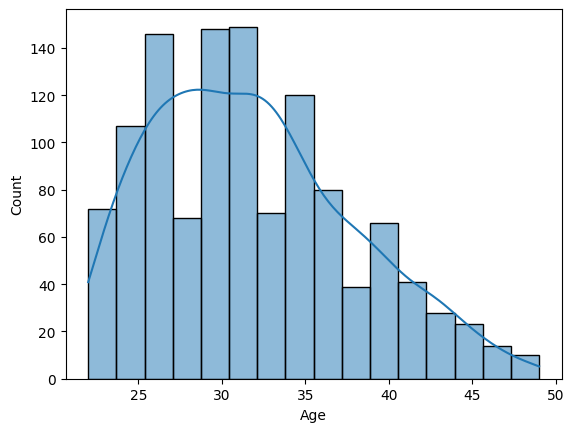

In [12]:
sns.histplot(data=df,x='Age',kde=True)
plt.show()

Above graph shows age is right skewed so we apply LOG TRANSFORMATION to age column so that distribution becomes normal and outliers with large values also get compressed to smaller values

In [13]:
Y_train_log=np.log1p(Y_train)
Y_test_log=np.log1p(Y_test)
pipe_log=Pipeline([
     ('preprocessor',create_prepipe(X_train)),
    ('model',XGBRegressor())
]
)
param_grid_log={
    'model__n_estimators':[100,200],
    'model__max_depth':[3,5,7],
    'model__subsample':[0.8,1.0],
    'model__learning_rate':[0.01,0.1,1],
    'model__colsample_bytree':[0.8,1.0]
}
   
gscv_log=GridSearchCV(pipe_log,param_grid_log,cv=5)
gscv_log.fit(X_train,Y_train_log)
Y_pred_log=gscv_log.predict(X_test)
Y_pred_=np.expm1(Y_pred_log)

print("best parameters:",gscv_log.best_params_)
print("MAE:",mean_absolute_error(Y_test,Y_pred_))
print("RMSE:",root_mean_squared_error(Y_test,Y_pred_))
print("R2 Score", r2_score(Y_test,Y_pred_))



best parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__n_estimators': 200, 'model__subsample': 0.8}
MAE: 4.744976997375488
RMSE: 5.944920539855957
R2 Score 0.05068707466125488


Now, let's also try to improve regression results by Robust scaler

In [14]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
Y_train_scale = rs.fit_transform(Y_train.values.reshape(-1, 1))
pipe4=Pipeline([
     ('preprocessor',create_prepipe(X_train)),
    ('model',XGBRegressor())
]
)

param_grid4={
    'model__n_estimators':[100,200],
    'model__max_depth':[3,5,7],
    'model__subsample':[0.8,1.0],
    'model__learning_rate':[0.01,0.1,1],
    'model__colsample_bytree':[0.8,1.0]
}
    
gscv4=GridSearchCV(pipe4,param_grid4,cv=5)
gscv4.fit(X_train,Y_train_scale)
Y_pred4=gscv4.predict(X_test)
Y_pred4=rs.inverse_transform(Y_pred4.reshape(-1,1)).ravel()

print("best parameters:",gscv4.best_params_)
print("MAE:",mean_absolute_error(Y_test,Y_pred4))
print("RMSE:",root_mean_squared_error(Y_test,Y_pred4))
print("R2 Score", r2_score(Y_test,Y_pred4))


best parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__n_estimators': 200, 'model__subsample': 0.8}
MAE: 4.703150749206543
RMSE: 5.867020606994629
R2 Score 0.07540297508239746


Binning

In [15]:
# from sklearn.preprocessing import KBinsDiscretizer
# kbin=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')
# Y_train=Y_train.reshape(-1,1)
# Y_test=Y_test.reshape(-1,1)
# kbin.fit(Y_train)

# # Transform both sets
# Y_train_binned = kbin.transform(Y_train)
# Y_test_binned = kbin.transform(Y_test)

# def create_prepipe(X):
#     # num_cols=X.select_dtypes(include='number').columns.tolist()
#     cat_cols=X.select_dtypes(include='object').columns.tolist()
#     # num_pipe = Pipeline([
#     #     ('scaler', StandardScaler())
#     # ])
    
#     cat_pipe = Pipeline([
#         ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
#     ])
    
#     preprocessor = ColumnTransformer([
#         # ('num', num_pipe, num_cols),
#         ('cat', cat_pipe, cat_cols)
#     ])
#     return preprocessor

# pipe3=Pipeline([
#      ('preprocessor',create_prepipe(X_train)),
#     ('model',RandomForestClassifier())
# ]
# )

# param_grid3={
#     'model__n_estimators':[100,200],
#     'model__max_depth':[3,5],
#     'model__min_samples_split':[2,5],
#     'model__min_samples_leaf':[2,3]

# }
# gscv3=GridSearchCV(pipe3,param_grid3,cv=5)
# gscv3.fit(X_train,Y_train_binned.ravel())
# Y_pred3=gscv3.predict(X_test)
# age_ranges = kbin.inverse_transform(Y_pred3.reshape(-1, 1))
# print(Y_pred3)
# age_ranges = kbin.inverse_transform(Y_pred3.reshape(-1, 1))
# print(age_ranges)

# print("best parameters:",gscv3.best_params_)
# # print("MAE:",classification_report(Y_test,Y_pred3))
# # print("RMSE:",f1_score(Y_test,Y_pred3))
# print("R2 Score", accuracy_score(Y_test,Y_pred3))





